In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 1. Одномерная оптимизация

In [2]:
def f(x):
    return x ** 4 + 2 * x ** 2 + 4 * x + 1

In [3]:
def Fi(n):
    
    F1 = 1
    F2 = 1
    
    for __ in range(n):
        F1, F2 = F2, F1 + F2

    return F1

In [4]:
def Fibonacci_Method(a, b, eps, f):
    
    n = 0
    while Fi(n) < (abs(b - a) / eps):
        n += 1

    k = 0
    
    x = a + (b - a) * (Fi(n - 2) / Fi(n))
    y = a + (b - a) * (Fi(n - 1) / Fi(n))
    
    while k != n - 3:

        k += 1
        
        if f(x) <= f(y):
            b = y
            y = x
            x = a + (b - a) * (Fi(n - k - 3) / Fi(n - k - 1))
        
        elif f(x) > f(y):
            a = x
            x = y
            y = a + (b - a) * (Fi(n - k - 2) / Fi(n - k - 1))

    y = x + eps
    
    if f(x) <= f(y):
        b = y
    elif f(x) > f(y):
        a = x
    
    return (a + b) / 2

In [5]:
a = -1
b = 0
eps = 0.1

x_min = Fibonacci_Method(a, b, eps, f)

In [6]:
print('x_min =', x_min)
print('y_min =', f(x_min))

x_min = -0.6423076923076922
y_min = -0.5739073559661776


### 2. Многомерная оптимизация (безусловная)

In [7]:
def function(x):
    return np.sqrt(x[0] ** 2 + x[1] ** 2 + 1) + x[0] / 2 - x[1] / 2

def gradient(x):
    return np.array([(x[0] / np.sqrt(x[0] ** 2 + x[1] ** 2 + 1)) + 1/2, (x[1] / np.sqrt(x[0] ** 2 + x[1] ** 2 + 1)) - 1/2])
    
def hessian(x):
    
    denominator = (x[0] ** 2 + x[1] ** 2 + 1) ** (3/2)
    hessian11 = (x[1] ** 2 + 1) / denominator
    hessian12 = - (x[0] * x[1]) / denominator
    hessian22 = (x[0] ** 2 + 1) / denominator
    
    return np.array([[hessian11, hessian12], [hessian12, hessian22]])

In [8]:
def Newton_method(f, x0, kmax):
    
    x = x0
    k = 0
    steps = []
    steps.append([x[0], x[1]])

    while (max(abs(gradient(x))) > 1e-3) and (k < kmax):
        
        k += 1
        
        x = x - np.dot(np.linalg.inv(hessian(x)), gradient(x))
        
        if k == kmax:
            print('метод Ньютона расходится')
        else:
            steps.append([x[0], x[1]])
            
    return k, x, steps

In [9]:
x0 = np.array([0, 1])
k, x_min, steps = Newton_method(f, x0, kmax = 100)

print('k =', k)
print('x1 =', x_min[0])
print('x2 =', x_min[1])
print('f* =', function(x_min))

k = 3
x1 = -0.7062474203367445
x2 = 0.7059202899500006
f* = 0.7071071703359854


Text(0.5, 0, 'x2')

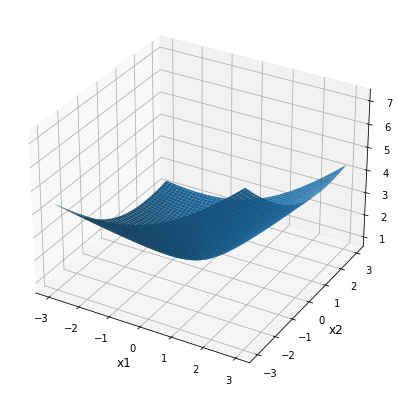

In [10]:
fig = plt.figure(figsize=(7, 7))
ax = fig.gca(projection='3d')

x = list(np.linspace(-3, 3, 100))
y = list(np.linspace(-3, 3, 100))
x, y = np.meshgrid(x, y)
z = np.sqrt(x ** 2 + y ** 2 + 1) + x / 2 - y / 2

a = ax.plot_surface(x, y, z)
ax.set_xlabel('x1', fontsize = 12)
ax.set_ylabel('x2', fontsize = 12)

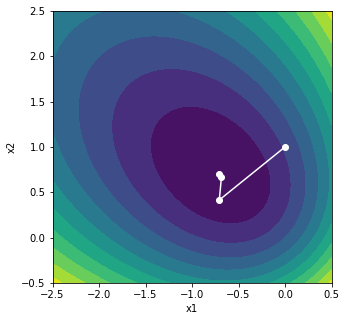

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

x = list(np.linspace(-2.5, 0.5, 100))
y = list(np.linspace(-0.5, 2.5, 100))

x, y = np.meshgrid(x, y)
z = np.sqrt(x ** 2 + y ** 2 + 1) + x / 2 - y / 2

ax.contourf(x, y, z, 10)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
steps = np.matrix(steps)
ax.plot(steps[:,0], steps[:,1], '-o', color='white')